In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Linear Regression Homework

 | Concentration C | First Measurement | Second Measurement | Third Measurement |
 | --------------- | ----------------- | ------------------ | ------------------- |
 | 125 | 0.08 | 0.095 | 0.088 |
 | 250 | 0.15 | 0.17 | 0.16 |
 | 500 | 0.32 | 0.35 | 0.34 |
 | 750 | 0.485 | 0.51 | 0.50 |
 | 1000 | 0.62 | 0.66 | 0.65 |
 | 1500 | 0.90 | 0.94 | 0.92 |
 | 2000 | 1.05 | 1.10 | 1.08 |

1. Concentration would be the independent variable and the amount measured would be dependent on this.

2. I will use matplotlib to plot this, and after looking at the points add a line based on an approximation.

First I create two lists:

```python
C = [125, 250, 500, 750, 1000, 1500, 2000]
meas1 = [0.08, 0.15, 0.32, 0.485, 0.62, 0.90, 1.05]

```



In [2]:
C = [125, 250, 500, 750, 1000, 1500, 2000]
meas1 = [0.08, 0.15, 0.32, 0.485, 0.62, 0.90, 1.05]

<IPython.core.display.Javascript object>


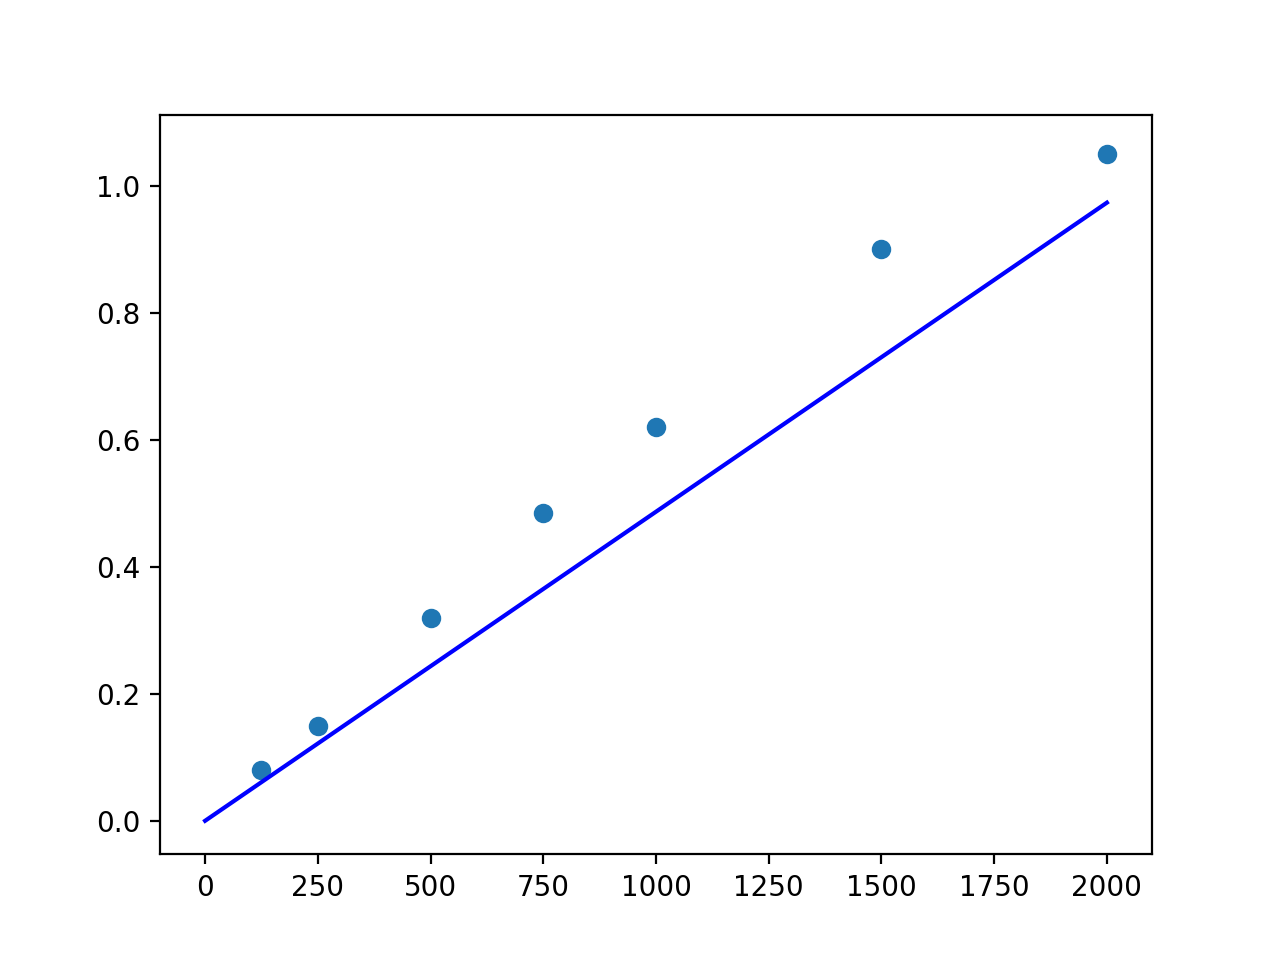

In [6]:
plt.figure()
plt.scatter(C, meas1)

In [7]:
slope = (1.05 - 0.32)/(2000 - 500)
x = np.linspace(0,2000,10000)
y = slope*x
plt.plot(x, y, '-b')
print("My equation is y = ", slope, "x.  I think it needs a steeper slope.")

My equation is y =  0.00048666666666666666 x.  I think it needs a steeper slope.


To approximate the fit, I used two points $(500, .32)$ and $(2000, 1.05)$.

In [8]:
print((1.05 - .32)/(2000 - 500),"x + ", 0.0005*(-500) + 0.32)


0.00048666666666666666 x +  0.07


Which came from equation $y = 0.0005(x - 500) + 0.32$

e. I can use the `np.polyfit()` function to find the line of best fit.

In [9]:
m1, b1 = np.polyfit(C, meas1, 1)

In [10]:
print("Slope, ", m1, "\nIntercept, ", b1)

Slope,  0.000534606741573 
Intercept,  0.0472191011236


This line has a higer slope and lower $y$-intercept than my approximation.  

f. I can use the `stats.linregress` function from `scipy` to examine the correlation coefficient.  Here, it is 0.9926, which is very close to 1.  This indicates a significant correlation between the two variables.

In [11]:
from scipy import stats

In [12]:
stats.linregress(C, meas1)

LinregressResult(slope=0.00053460674157303374, intercept=0.047219101123595508, rvalue=0.99256291242721195, pvalue=9.1249098623846818e-06, stderr=2.9322355468756015e-05)

g. The slope of the line relates to the rate of change of measurement by concentration.  Here, by changing the concentration by one microgram per millileter the measurement increases by 0.0005.  The intercept suggests the measurement with a concentration of zero.  The fact that it is not zero is interesting.

h. Now I create two more lists with the measurements and repeat the fitting.

In [13]:
#make two lists named meas2 and meas3
meas2 = [0.095, 0.17, 0.35, 0.51, 0.66, 0.94, 1.10]
meas3 = [0.088, 0.16, 0.34, 0.5, 0.65, 0.92, 1.08]

In [14]:
#use stats linear regression model to find fit info
stats.linregress(C, meas2)

LinregressResult(slope=0.00055191011235955056, intercept=0.063507223113964728, rvalue=0.99272998665988821, pvalue=8.6218077152362353e-06, stderr=2.9925680904899615e-05)

In [15]:
#use stats linear regression model to find the fit
stats.linregress(C, meas3)

LinregressResult(slope=0.00054480898876404496, intercept=0.057292134831460673, rvalue=0.99243685931119907, pvalue=9.5158456726274821e-06, stderr=3.0136981381050549e-05)

While the slopes stay fairly close, it seems the intercept is changing.  All have high correlations at .99.

In [16]:
#a quick way to add each element from the lists
avg = list(map(sum, zip(meas1, meas2, meas3)))

In [17]:
#run linear regression on average values
stats.linregress(C, avg)

LinregressResult(slope=0.0016313258426966296, intercept=0.1680184590690208, rvalue=0.99259684311093943, pvalue=9.0213522703971894e-06, stderr=8.9269071958461178e-05)

This gave me a much higher slope and intercept than earlier, however it gives me a high coefficient value.

I use the average fit to predict values for the last two questions.

In [18]:
#name variables m, b, r, p, sterr for slope, y-intercept
#r value, p value, and standard error
m, b, r, p, sterr = stats.linregress(C, avg)

In [19]:
#use slope and intercept from model to define a new
#function named predict
def predict(x):
    return m*x + b

In [20]:
#use model to predict value at 400
predict(400)

0.82054879614767262

In [21]:
#predict at C = 900
predict(900)

1.6362117174959874

In [22]:
#predict at C = 1800
predict(1800)

3.1044049759229537

In [23]:
#predict at C = 2400
predict(2400)

4.0832004815409322

In [24]:
#solve the inverse problem, given y find x
#first solve equation y = mx + b for x
def inv_predict(y):
    return (y-b)/m

In [25]:
#predict c given y
inv_predict(0.25)

50.254546814179875

In [26]:
inv_predict(0.75)

356.75370652434867

In [27]:
inv_predict(1.25)

663.25286623451746

I don't think these are very good, they seem high compared to the original data.